# Principal Component Analysis Assignment

In [ ]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

### Import the [PitchFX data set](https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv).

In [ ]:
data = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv"
)
data.head(2)

,gameString,gameDate,visitor,home,inning,side,balls,strikes,outs,batterId,...,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallType,battedBallAngle,battedBallDistance,paResult
0,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,0,452655,...,2044.22,205.477,-0.374,2.933,-6.93,8.28,NaN,NaN,NaN,NaN
1,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,0,452655,...,1966.32,220.143,0.342,3.223,-7.48,7.35,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

### Keep only the pitch type and the numeric columns (exluding ID fields).

* Drop any remaining records that contain null values.
* Consider `pitchType` as `y`/target and the remaining columns to be `X`/features.

In [ ]:
data.isnull().sum()

gameString                0
gameDate                  0
visitor                   0
home                      0
inning                    0
side                      0
balls                     0
strikes                   0
outs                      0
batterId                  0
batterName                0
batterHand                0
batterPosition            0
pitcherId                 0
pitcherName               0
pitcherHand               0
timesFaced                0
catcherId                 0
catcher                   0
umpireId                  0
umpire                    0
probCalledStrike         10
pitchResult               0
pitchType                 0
releaseVelocity           0
spinRate               6197
spinDir                 311
locationHoriz             0
locationVert              0
movementHoriz             0
movementVert              0
battedBallType        65432
battedBallAngle       65432
battedBallDistance    65432
paResult              59340
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
X = data.drop(
    columns=[
        "battedBallType",
        "battedBallAngle",
        "battedBallDistance",
        "paResult",
        "batterId",
        "pitcherId",
        "catcherId",
        "umpireId",
    ],
)
X = X.dropna()
X.isnull().sum()

gameString          0
gameDate            0
visitor             0
home                0
inning              0
side                0
balls               0
strikes             0
outs                0
batterName          0
batterHand          0
batterPosition      0
pitcherName         0
pitcherHand         0
timesFaced          0
catcher             0
umpire              0
probCalledStrike    0
pitchResult         0
pitchType           0
releaseVelocity     0
spinRate            0
spinDir             0
locationHoriz       0
locationVert        0
movementHoriz       0
movementVert        0
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
X.dtypes.value_counts()

object     14
float64     8
int64       5
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
y = X.pitchType
X = X.select_dtypes(include="number")

<IPython.core.display.Javascript object>

In [ ]:
X.head(2)

,inning,balls,strikes,outs,timesFaced,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert
0,1,0,0,0,1,0.975,94.2,2044.22,205.477,-0.374,2.933,-6.93,8.28
1,1,0,1,0,1,0.745,97.1,1966.32,220.143,0.342,3.223,-7.48,7.35


<IPython.core.display.Javascript object>

In [ ]:
X.shape

(73725, 13)

<IPython.core.display.Javascript object>

In [ ]:
y.shape

(73725,)

<IPython.core.display.Javascript object>

### Reduce the dimensionality of the data using PCA to two components.

Don't forget to scale.

In [ ]:
scale = StandardScaler()
X_scale = scale.fit_transform(X)

<IPython.core.display.Javascript object>

In [ ]:
pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(X_scale), columns=["pca_1", "pca_2"])

<IPython.core.display.Javascript object>

In [ ]:
pca_components

,pca_1,pca_2
0,-1.833255,-0.559035
1,-1.969858,-0.378755
2,-1.501920,-0.535110
3,-1.738038,-0.428477
4,-1.744163,-0.286560
...,...,...
73720,-0.793647,-0.858312
73721,-1.057250,0.413322
73722,-0.088357,1.103040
73723,-0.642825,-1.024676


<IPython.core.display.Javascript object>

KeyError: 0

<IPython.core.display.Javascript object>

### Compute the explained variance for new data set.

In [ ]:
print(pca.explained_variance_)

[2.40644312 1.4863498 ]


<IPython.core.display.Javascript object>

### Generate a scatter plot that visualizes how the component values are distributed.

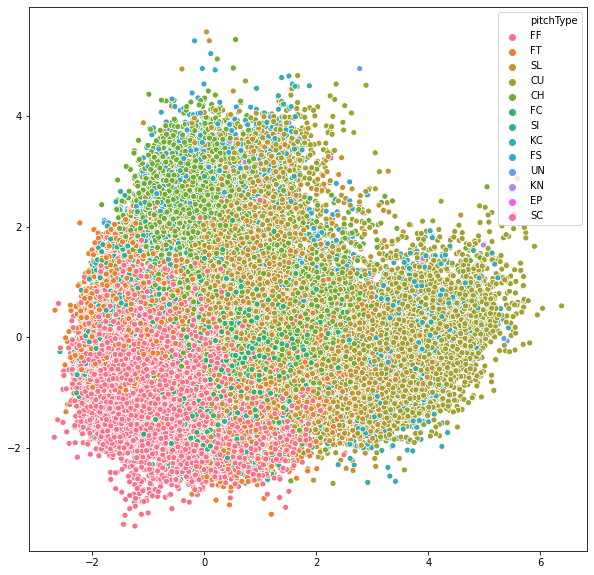

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(pca_components[:, 0], pca_components[:, 1], hue=y)
plt.show()

### Create a line plot that shows the explained variance by number of components.

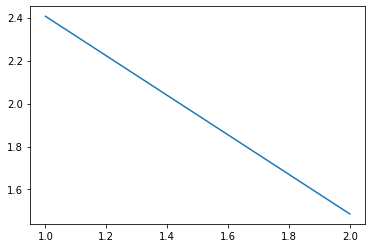

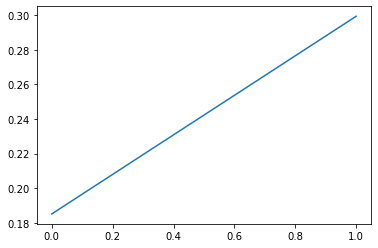

<IPython.core.display.Javascript object>

In [ ]:
plt.plot([1, 2], pca.explained_variance_)
plt.show()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

### Iteratively train and score a Random Forest Classifier (to predict `pitchType`).

* In each iteration:
    * Increase the number of principal components (start with `2`)
    * Store the number of components and model score

In [ ]:
model = RandomForestClassifier(max_depth=4, random_state=1)

<IPython.core.display.Javascript object>

In [ ]:
scores = []
n_components = list(range(2, 14))
for i in n_components:
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_scale)
    model.fit(X_pca, y)
    score = model.score(X_pca, y)
    scores.append(score)

<IPython.core.display.Javascript object>

### Create a line plot that shows the training scores across the different numbers of principal components.

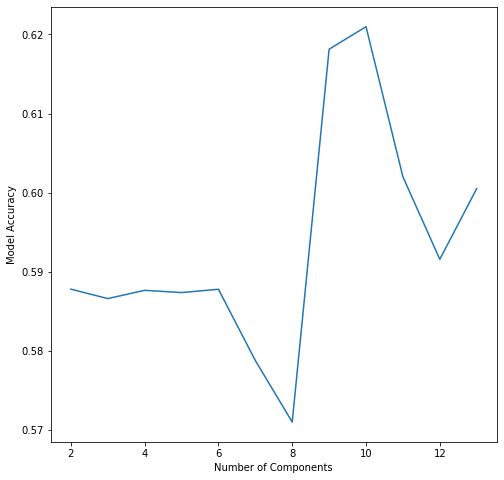

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(n_components, scores)
plt.xlabel("Number of Components")
plt.ylabel("Model Accuracy")
plt.show()

### Based on the analysis you conducted, what is the optimal number of principal components?

It seems like the optimal number of principal components is 10